In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/


Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
df=pd.read_csv('./credit_scoring.csv',sep=";",header=0)
df.head(10)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1
5,1.0,0.0,60.0,36.0,0.0,1.0,0.0,75.0,214.0,3500.0,0.0,650.0,1645.0,1
6,29.0,0.0,60.0,44.0,0.0,1.0,0.0,75.0,125.0,10000.0,0.0,1600.0,1800.0,1
7,9.0,1.0,12.0,27.0,1.0,1.0,0.0,35.0,80.0,0.0,0.0,200.0,1093.0,1
8,0.0,0.0,60.0,32.0,0.0,1.0,1.0,90.0,107.0,15000.0,0.0,1200.0,1957.0,1
9,0.0,1.0,48.0,41.0,0.0,1.0,1.0,90.0,80.0,0.0,0.0,1200.0,1468.0,0


In [ ]:
X=df.iloc[:,0:13].values
y=df.iloc[:,-1].values

In [ ]:
df.shape

(4375, 14)

In [ ]:

#df.groupby('Year')['Sex'].value_counts().unstack().plot.bar(ylabel='Status')
df.groupby(['Status']).apply(lambda x: pd.Series(dict(
positive_tweets=(df.Status == 1).sum(),
negative_tweets=(df.Status == 0).sum(),
)))

,positive_tweets,negative_tweets
Status,,
0,3159,1216
1,3159,1216


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec0e9647d0>]],
      dtype=object)

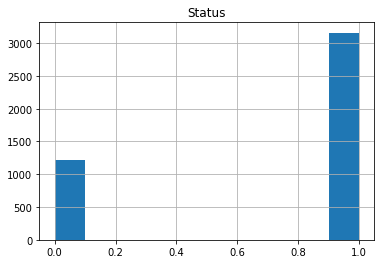

In [ ]:
df.hist(column='Status')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt


In [ ]:
Tree = DecisionTreeClassifier(criterion="gini",random_state=1)
Tree.fit(X_train,y_train)
predTree = Tree.predict(X_test)

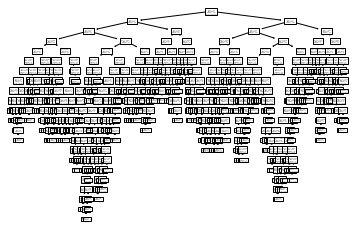

In [ ]:
tree.plot_tree(Tree)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 1, 1, 1])

In [ ]:
 from sklearn.neural_network import MLPClassifier
 clf = MLPClassifier(random_state=1,hidden_layer_sizes=(40,20))

In [ ]:
clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)

In [ ]:
y_pred=clf.predict(X_test)

# ***Accuracy of 3 algo :***

In [ ]:
print(confusion_matrix(predTree, y_test))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print('precision_score of CART : ', precision_score(y_test, predTree))
print('recall_score of CART : ', recall_score(y_test, predTree))

[[ 325  318]
 [ 279 1266]]
DecisionTrees's Accuracy:  0.7271480804387569
precision_score of CART :  0.8194174757281554
recall_score of CART :  0.7992424242424242


In [ ]:
print(confusion_matrix(yhat, y_test))
print("Train set Accuracy of KNN: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy of KNN: ", metrics.accuracy_score(y_test, yhat))
print('precision_score of KNN : ', precision_score(y_test, yhat))
print('recall_score of KNN : ', recall_score(y_test, yhat))


[[ 189  187]
 [ 415 1397]]
Train set Accuracy of KNN:  0.7965249199817102
Test set Accuracy of KNN:  0.7248628884826326
precision_score of KNN :  0.7709713024282561
recall_score of KNN :  0.8819444444444444


In [ ]:
print(confusion_matrix(y_pred, y_test))
print("Train set Accuracy of NEURAL-N: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy of NEURAL-N: ", metrics.accuracy_score(y_test, y_pred))
print('precision_score of NEURAL-N : ', precision_score(y_test, y_pred))
print('recall_score of NEURAL-N : ', recall_score(y_test, y_pred))


[[ 285  342]
 [ 319 1242]]
Train set Accuracy of NEURAL-N:  0.7091906721536351
Test set Accuracy of NEURAL-N:  0.6978976234003657
precision_score of NEURAL-N :  0.7956438180653427
recall_score of NEURAL-N :  0.7840909090909091


# ***Normalisation :***

In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS.fit(X_train)
X_train_norm=SS.transform(X_train)
X_test_norm=SS.transform(X_test)


In [ ]:
Tree = DecisionTreeClassifier(criterion="gini",random_state=1)
Tree.fit(X_train_norm,y_train)
predTree = Tree.predict(X_test_norm)


In [ ]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
yhat = neigh.predict(X_test_norm)

In [ ]:
clf = MLPClassifier(random_state=1,hidden_layer_sizes=(40,20))
clf.fit(X_train_norm, y_train)
y_pred=clf.predict(X_test_norm)

In [ ]:
print(confusion_matrix(predTree, y_test))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print('precision_score of CART : ', precision_score(y_test, predTree))
print('recall_score of CART : ', recall_score(y_test, predTree))

[[ 322  315]
 [ 282 1269]]
DecisionTrees's Accuracy:  0.7271480804387569
precision_score of CART :  0.8181818181818182
recall_score of CART :  0.8011363636363636


In [ ]:
print(confusion_matrix(yhat, y_test))
print("Train set Accuracy of KNN: ", metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
print("Test set Accuracy of KNN: ", metrics.accuracy_score(y_test, yhat))
print('precision_score of KNN : ', precision_score(y_test, yhat))
print('recall_score of KNN : ', recall_score(y_test, yhat))

[[ 286  223]
 [ 318 1361]]
Train set Accuracy of KNN:  0.8271604938271605
Test set Accuracy of KNN:  0.7527422303473492
precision_score of KNN :  0.8106015485407981
recall_score of KNN :  0.8592171717171717


In [ ]:
print(confusion_matrix(y_pred, y_test))
print("Train set Accuracy of NEURAL-N: ", metrics.accuracy_score(y_train, clf.predict(X_train_norm)))
print("Test set Accuracy of NEURAL-N: ", metrics.accuracy_score(y_test, y_pred))
print('precision_score of NEURAL-N : ', precision_score(y_test, y_pred))
print('recall_score of NEURAL-N : ', recall_score(y_test, y_pred))

[[ 342  227]
 [ 262 1357]]
Train set Accuracy of NEURAL-N:  0.8673982624599909
Test set Accuracy of NEURAL-N:  0.776508226691042
precision_score of NEURAL-N :  0.8381717109326745
recall_score of NEURAL-N :  0.8566919191919192


# ***PCA :***

In [ ]:
from sklearn.decomposition import PCA
from sklearn import decomposition
pca=decomposition.PCA(n_components=3)
pca.fit(X_train_norm)
X_pca_train=pca.transform(X_train_norm)
X_pca_train=np.concatenate((X_train_norm,X_pca_train),axis=1)
X_pca_test=pca.transform(X_test_norm)
X_pca_test=np.concatenate((X_test_norm,X_pca_test),axis=1)

In [ ]:
Tree = DecisionTreeClassifier(criterion="gini",random_state=1)
Tree.fit(X_pca_train,y_train)
predTree = Tree.predict(X_pca_test)

In [ ]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_pca_train,y_train)
yhat = neigh.predict(X_pca_test)

In [ ]:
clf = MLPClassifier(random_state=1,hidden_layer_sizes=(40,20))
clf.fit(X_pca_train, y_train)
y_pred=clf.predict(X_pca_test)

In [ ]:
print(confusion_matrix(predTree, y_test))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print('precision_score of CART : ', precision_score(y_test, predTree))
print('recall_score of CART : ', recall_score(y_test, predTree))

[[ 351  324]
 [ 253 1260]]
DecisionTrees's Accuracy:  0.7362888482632541
precision_score of CART :  0.8327825512227363
recall_score of CART :  0.7954545454545454


In [ ]:
print(confusion_matrix(yhat, y_test))
print("Train set Accuracy of KNN: ", metrics.accuracy_score(y_train, neigh.predict(X_pca_train)))
print("Test set Accuracy of KNN: ", metrics.accuracy_score(y_test, yhat))
print('precision_score of KNN : ', precision_score(y_test, yhat))
print('recall_score of KNN : ', recall_score(y_test, yhat))

[[ 283  212]
 [ 321 1372]]
Train set Accuracy of KNN:  0.8248742569730224
Test set Accuracy of KNN:  0.756398537477148
precision_score of KNN :  0.8103957471943296
recall_score of KNN :  0.8661616161616161


In [ ]:
print(confusion_matrix(y_pred, y_test))
print("Train set Accuracy of NEURAL-N: ", metrics.accuracy_score(y_train, clf.predict(X_pca_train)))
print("Test set Accuracy of NEURAL-N: ", metrics.accuracy_score(y_test, y_pred))
print('precision_score of NEURAL-N : ', precision_score(y_test, y_pred))
print('recall_score of NEURAL-N : ', recall_score(y_test, y_pred))

[[ 318  217]
 [ 286 1367]]
Train set Accuracy of NEURAL-N:  0.8692272519433013
Test set Accuracy of NEURAL-N:  0.770109689213894
precision_score of NEURAL-N :  0.8269812462189957
recall_score of NEURAL-N :  0.8630050505050505


# **Random Forest :**

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


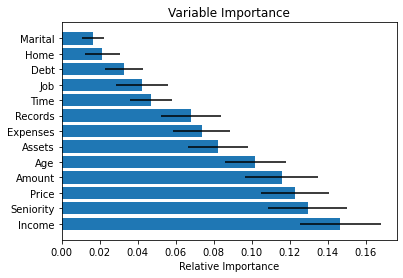

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_norm, y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features =df.columns
print(features[sorted_idx])
padding = np.arange(X_train_norm.size/len(X_train_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

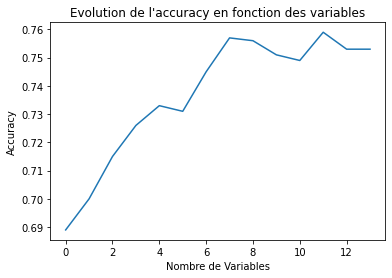

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train_norm.shape[1]+1)
for f in np.arange(0, X_train_norm.shape[1]+1):
 X1_f = X_train_norm[:,sorted_idx[:f+1]]
 X2_f = X_test_norm[:,sorted_idx[:f+1]]
 KNN.fit(X1_f,y_train)
 YKNN=KNN.predict(X2_f)
 scores[f]=np.round(metrics.accuracy_score(y_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

# **GridSearchCV :**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(30,10),(50,30)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid_NEURAL_NN = GridSearchCV(MLPClassifier(),parameter_space)

grid_NEURAL_NN.fit(X_train_norm, y_train)
 
grid_predictions_NEURAL_NN = grid_NEURAL_NN.predict(X_test_norm) 
   
print('NEURAL_NN :',metrics.classification_report(y_test, grid_predictions_NEURAL_NN))


NEURAL_NN :               precision    recall  f1-score   support

           0       0.67      0.53      0.59       604
           1       0.83      0.90      0.87      1584

    accuracy                           0.80      2188
   macro avg       0.75      0.71      0.73      2188
weighted avg       0.79      0.80      0.79      2188



# **Pipline and Pickle :**

In [ ]:
from sklearn.pipeline import Pipeline
import pickle
pipe = Pipeline([('SS', StandardScaler()),('pca',PCA()), ('clf', MLPClassifier())])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
s = pickle.dumps(pipe)
pipe2 = pickle.loads(s)
print(pipe2.score(X_test, y_test))

0.7861060329067642
0.7861060329067642


# **Comparaison de plusieurs algorithmes d’apprentissage :**

## **naive_bayes :**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer,accuracy_score
from sklearn import model_selection
import time
start = time.time()

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_pca_train, y_train).predict(X_pca_test)


#-----------------1-------------------------------
# print(cross_val_score(gnb, X, y, scoring="roc_auc", cv = 10))
mean_score = cross_val_score(gnb, X, y, scoring="roc_auc", cv = 10).mean()
std_score = cross_val_score(gnb, X, y, scoring="roc_auc", cv = 10).std()
print('mean_score : ',mean_score)
print('std_score : ',std_score)

#-----------------2-------------------------------

scores =model_selection.cross_validate(gnb,X,y,scoring=('accuracy', 'precision','recall'),return_train_score=True)

print('test_accuracy mean : ',scores ['test_accuracy'].mean())
print('test_accuracy std : ',scores ['test_accuracy'].std())
print('test_precision mean : ',scores ['test_precision'].mean())
print('test_precision std : ',scores ['test_precision'].std())
print('test_recall mean : ',scores ['test_recall'].mean())
print('test_recall std : ',scores ['test_recall'].std())


print("Test set Accuracy of naivebayes : ", metrics.accuracy_score(y_test, y_pred_gnb))
print('precision_score of naivebayes : ', precision_score(y_test, y_pred_gnb))
print('recall_score of naivebayes : ', recall_score(y_test, y_pred_gnb))

end = time.time()
#----------------3-----------------------
print('TIME : ',end - start, "seconds")


mean_score :  0.7896031412224181
std_score :  0.018456198390468734
test_accuracy mean :  0.7645714285714286
test_accuracy std :  0.013959708785922268
test_precision mean :  0.8282756574554277
test_precision std :  0.012139666419848384
test_recall mean :  0.8509002186603543
test_recall std :  0.03013814503078259
Test set Accuracy of naivebayes :  0.7504570383912249
precision_score of naivebayes :  0.8383311603650587
recall_score of naivebayes :  0.8118686868686869
TIME :  0.18730926513671875 seconds


# **CART :**

In [ ]:
start = time.time()

Tree = DecisionTreeClassifier(criterion="gini",random_state=1)
Tree.fit(X_pca_train,y_train)
y_pred_tree = Tree.predict(X_pca_test)

#-----------------1-------------------------------

mean_score = cross_val_score(Tree, X, y, scoring="roc_auc", cv = 10).mean()
std_score = cross_val_score(Tree, X, y, scoring="roc_auc", cv = 10).std()
print('mean_score : ',mean_score)
print('std_score : ',std_score)

#-----------------2-------------------------------

scores = model_selection.cross_validate(Tree,X,y,scoring=('accuracy', 'precision','recall'),return_train_score=True)

print('test_accuracy mean : ',scores ['test_accuracy'].mean())
print('test_accuracy std : ',scores ['test_accuracy'].std())
print('test_precision mean : ',scores ['test_precision'].mean())
print('test_precision std : ',scores ['test_precision'].std())
print('test_recall mean : ',scores ['test_recall'].mean())
print('test_recall std : ',scores ['test_recall'].std())


print("Test set Accuracy of CART : ", metrics.accuracy_score(y_test, y_pred_tree))
print('precision_score of CART : ', precision_score(y_test, y_pred_tree))
print('recall_score of CART : ', recall_score(y_test, y_pred_tree))

end = time.time()
#----------------3-----------------------
print('TIME : ',end - start, "seconds")



mean_score :  0.6472359812187956
std_score :  0.023114257686935542
test_accuracy mean :  0.7131428571428572
test_accuracy std :  0.010696556760500662
test_precision mean :  0.8019289354666057
test_precision std :  0.015415305257664902
test_recall mean :  0.8011976168027442
test_recall std :  0.014972739436606364
Test set Accuracy of CART :  0.7362888482632541
precision_score of CART :  0.8327825512227363
recall_score of CART :  0.7954545454545454
TIME :  0.6846733093261719 seconds


# **Id3 :**

In [ ]:
!pip install decision-tree-id3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator


start = time.time()
estimator_id3 = Id3Estimator()

estimator_id3.fit(X_pca_train,y_train)
y_pred_tree = estimator_id3.predict(X_pca_test)

#-----------------1-------------------------------

mean_score = cross_val_score(estimator_id3, X, y, scoring="roc_auc", cv = 10).mean()
std_score = cross_val_score(estimator_id3, X, y, scoring="roc_auc", cv = 10).std()
print('mean_score : ',mean_score)
print('std_score : ',std_score)

#-----------------2-------------------------------

scores = model_selection.cross_validate(estimator_id3,X,y,scoring=('accuracy', 'precision','recall'),return_train_score=True)

print('test_accuracy mean : ',scores ['test_accuracy'].mean())
print('test_accuracy std : ',scores ['test_accuracy'].std())
print('test_precision mean : ',scores ['test_precision'].mean())
print('test_precision std : ',scores ['test_precision'].std())
print('test_recall mean : ',scores ['test_recall'].mean())
print('test_recall std : ',scores ['test_recall'].std())


print("Test set Accuracy of id3 : ", metrics.accuracy_score(y_test, y_pred_tree))
print('precision_score of id3 : ', precision_score(y_test, y_pred_tree))
print('recall_score of id3 : ', recall_score(y_test, y_pred_tree))

end = time.time()
#----------------3-----------------------
print('TIME : ',end - start, "seconds")



mean_score :  nan
std_score :  nan
test_accuracy mean :  0.7442285714285715
test_accuracy std :  0.01771096743114106
test_precision mean :  0.812988276782578
test_precision std :  0.006721613742075168
test_recall mean :  0.8386414987607742
test_recall std :  0.02717863841571649
Test set Accuracy of id3 :  0.7207495429616088
precision_score of id3 :  0.8132646490663232
recall_score of id3 :  0.7973484848484849
TIME :  63.52765512466431 seconds


# **Decision Stump - AdaBoost :**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

start = time.time()

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=50
)

bdt.fit(X_pca_train,y_train)
y_pred_tree = bdt.predict(X_pca_test)

#-----------------1-------------------------------

mean_score = cross_val_score(bdt, X, y, scoring="roc_auc", cv = 10).mean()
std_score = cross_val_score(bdt, X, y, scoring="roc_auc", cv = 10).std()
print('mean_score : ',mean_score)
print('std_score : ',std_score)

#-----------------2-------------------------------

scores = model_selection.cross_validate(bdt,X,y,scoring=('accuracy', 'precision','recall'),return_train_score=True)

print('test_accuracy mean : ',scores ['test_accuracy'].mean())
print('test_accuracy std : ',scores ['test_accuracy'].std())
print('test_precision mean : ',scores ['test_precision'].mean())
print('test_precision std : ',scores ['test_precision'].std())
print('test_recall mean : ',scores ['test_recall'].mean())
print('test_recall std : ',scores ['test_recall'].std())


print("Test set Accuracy of bdt : ", metrics.accuracy_score(y_test, y_pred_tree))
print('precision_score of bdt : ', precision_score(y_test, y_pred_tree))
print('recall_score of bdt : ', recall_score(y_test, y_pred_tree))

end = time.time()
#----------------3-----------------------
print('TIME : ',end - start, "seconds")




mean_score :  0.8351216279413143
std_score :  0.01848058380397238
test_accuracy mean :  0.7888000000000001
test_accuracy std :  0.009894793518588976
test_precision mean :  0.8192705022452464
test_precision std :  0.013467944832279222
test_recall mean :  0.9085137114084535
test_recall std :  0.020888786945845565
Test set Accuracy of bdt :  0.7915904936014625
precision_score of bdt :  0.8190045248868778
recall_score of bdt :  0.9141414141414141
TIME :  5.722641944885254 seconds


# **MLP :**

In [ ]:

start = time.time()

clf = MLPClassifier(random_state=1,hidden_layer_sizes=(20,10))
clf.fit(X_pca_train, y_train)
y_pred_mlp=clf.predict(X_pca_test)

#-----------------1-------------------------------

mean_score = cross_val_score(clf, X, y, scoring="roc_auc", cv = 10).mean()
std_score = cross_val_score(clf, X, y, scoring="roc_auc", cv = 10).std()
print('mean_score : ',mean_score)
print('std_score : ',std_score)

#-----------------2-------------------------------

scores = model_selection.cross_validate(clf,X,y,scoring=('accuracy', 'precision','recall'),return_train_score=True)

print('test_accuracy mean : ',scores ['test_accuracy'].mean())
print('test_accuracy std : ',scores ['test_accuracy'].std())
print('test_precision mean : ',scores ['test_precision'].mean())
print('test_precision std : ',scores ['test_precision'].std())
print('test_recall mean : ',scores ['test_recall'].mean())
print('test_recall std : ',scores ['test_recall'].std())


print("Test set Accuracy of MLP : ", metrics.accuracy_score(y_test, y_pred_mlp))
print('precision_score of MLP : ', precision_score(y_test, y_pred_mlp))
print('recall_score of MLP : ', recall_score(y_test, y_pred_mlp))

end = time.time()
#----------------3-----------------------
print('TIME : ',end - start, "seconds")


mean_score :  0.7286955053876472
std_score :  0.036609729381320164
test_accuracy mean :  0.6937142857142857
test_accuracy std :  0.061242642206960664
test_precision mean :  0.8101348629871395
test_precision std :  0.04575752995822742
test_recall mean :  0.771176452887721
test_recall std :  0.17228962884056334
Test set Accuracy of MLP :  0.7810786106032906
precision_score of MLP :  0.8342407743496673
recall_score of MLP :  0.8705808080808081
TIME :  29.103995323181152 seconds


# **KNN :**

In [ ]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_pca_train,y_train)
yhat = neigh.predict(X_pca_test)

start = time.time()

k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_pca_train,y_train)
y_pred_knn = neigh.predict(X_pca_test)



#-----------------1-------------------------------

mean_score = cross_val_score(neigh, X, y, scoring="roc_auc", cv = 10).mean()
std_score = cross_val_score(neigh, X, y, scoring="roc_auc", cv = 10).std()
print('mean_score : ',mean_score)
print('std_score : ',std_score)

#-----------------2-------------------------------

scores = model_selection.cross_validate(neigh,X,y,scoring=('accuracy', 'precision','recall'),return_train_score=True)

print('test_accuracy mean : ',scores ['test_accuracy'].mean())
print('test_accuracy std : ',scores ['test_accuracy'].std())
print('test_precision mean : ',scores ['test_precision'].mean())
print('test_precision std : ',scores ['test_precision'].std())
print('test_recall mean : ',scores ['test_recall'].mean())
print('test_recall std : ',scores ['test_recall'].std())


print("Test set Accuracy of KNN : ", metrics.accuracy_score(y_test, y_pred_knn))
print('precision_score of KNN : ', precision_score(y_test, y_pred_knn))
print('recall_score of KNN : ', recall_score(y_test, y_pred_knn))

end = time.time()
#----------------3-----------------------
print('TIME : ',end - start, "seconds")


mean_score :  0.6643336688898998
std_score :  0.031018852525618416
test_accuracy mean :  0.7154285714285714
test_accuracy std :  0.013676137418652867
test_precision mean :  0.7654280133624825
test_precision std :  0.006918761429213575
test_recall mean :  0.8736865333306586
test_recall std :  0.020550075859606245
Test set Accuracy of KNN :  0.756398537477148
precision_score of KNN :  0.8103957471943296
recall_score of KNN :  0.8661616161616161
TIME :  2.520246982574463 seconds


# **Bagging :**

In [ ]:
from sklearn import ensemble

start = time.time()

bag = ensemble.BaggingClassifier()

bag.fit(X_pca_train,y_train)
y_pred_bag = bag.predict(X_pca_test)

#-----------------1-------------------------------

mean_score = cross_val_score(bag, X, y, scoring="roc_auc", cv = 10).mean()
std_score = cross_val_score(bag, X, y, scoring="roc_auc", cv = 10).std()
print('mean_score : ',mean_score)
print('std_score : ',std_score)

#-----------------2-------------------------------

scores = model_selection.cross_validate(bag,X,y,scoring=('accuracy', 'precision','recall'),return_train_score=True)

print('test_accuracy mean : ',scores ['test_accuracy'].mean())
print('test_accuracy std : ',scores ['test_accuracy'].std())
print('test_precision mean : ',scores ['test_precision'].mean())
print('test_precision std : ',scores ['test_precision'].std())
print('test_recall mean : ',scores ['test_recall'].mean())
print('test_recall std : ',scores ['test_recall'].std())


print("Test set Accuracy of bagging : ", metrics.accuracy_score(y_test, y_pred_bag))
print('precision_score of bagging : ', precision_score(y_test, y_pred_bag))
print('recall_score of bagging : ', recall_score(y_test, y_pred_bag))

end = time.time()
#----------------3-----------------------
print('TIME : ',end - start, "seconds")



mean_score :  0.7868458747455473
std_score :  0.02355316083069628
test_accuracy mean :  0.7645714285714286
test_accuracy std :  0.008304412399810253
test_precision mean :  0.8337694801892548
test_precision std :  0.010369256133780941
test_recall mean :  0.8423458845714056
test_recall std :  0.024878628544583076
Test set Accuracy of bagging :  0.7595978062157221
precision_score of bagging :  0.8417312661498708
recall_score of bagging :  0.82260101010101
TIME :  4.688097715377808 seconds


# **Random Forest :**

In [ ]:
start = time.time()

RF = RandomForestClassifier(n_estimators=50)
RF.fit(X_pca_train,y_train)
y_pred_RF = RF.predict(X_pca_test)

#-----------------1-------------------------------

mean_score = cross_val_score(RF, X, y, scoring="roc_auc", cv = 10).mean()
std_score = cross_val_score(RF, X, y, scoring="roc_auc", cv = 10).std()
print('mean_score : ',mean_score)
print('std_score : ',std_score)

#-----------------2-------------------------------

scores = model_selection.cross_validate(RF,X,y,scoring=('accuracy', 'precision','recall'),return_train_score=True)

print('test_accuracy mean : ',scores ['test_accuracy'].mean())
print('test_accuracy std : ',scores ['test_accuracy'].std())
print('test_precision mean : ',scores ['test_precision'].mean())
print('test_precision std : ',scores ['test_precision'].std())
print('test_recall mean : ',scores ['test_recall'].mean())
print('test_recall std : ',scores ['test_recall'].std())


print("Test set Accuracy of RF : ", metrics.accuracy_score(y_test, y_pred_RF))
print('precision_score of RF : ', precision_score(y_test, y_pred_RF))
print('recall_score of RF : ', recall_score(y_test, y_pred_RF))

end = time.time()
#----------------3-----------------------
print('TIME : ',end - start, "seconds")



mean_score :  0.8244434783760889
std_score :  0.015208685956997928
test_accuracy mean :  0.7881142857142857
test_accuracy std :  0.011779747407291527
test_precision mean :  0.8233346308393626
test_precision std :  0.014029716384140375
test_recall mean :  0.9002813496760215
test_recall std :  0.02062508267156529
Test set Accuracy of RF :  0.7952468007312614
precision_score of RF :  0.831002331002331
recall_score of RF :  0.9002525252525253
TIME :  7.420989751815796 seconds


# **COMPARAISON :**

In [ ]:
def run_classifier():
    clfs = {
    'RF': RandomForestClassifier(n_estimators=50, random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'BAGGING' : ensemble.BaggingClassifier(),
    'MLP' : MLPClassifier(random_state=1,hidden_layer_sizes=(20,10)),
    'ADA_STUMP' : AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=50),
    'CART': DecisionTreeClassifier(criterion="gini",random_state=1),
    'NAIVE_BAYES': GaussianNB(),
    'ID3': Id3Estimator()
    }
    kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i]
        cv_acc = cross_val_score(clf, X, y,scoring="roc_auc", cv=kf)
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
run_classifier()

Accuracy for RF is: 0.782 +/- 0.014
Accuracy for KNN is: 0.732 +/- 0.016
Accuracy for BAGGING is: 0.763 +/- 0.025
Accuracy for MLP is: 0.699 +/- 0.080
Accuracy for ADA_STUMP is: 0.790 +/- 0.015
Accuracy for CART is: 0.727 +/- 0.025
Accuracy for NAIVE_BAYES is: 0.772 +/- 0.022
